In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Task a: Load the data
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14',
                'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29',
                'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44',
                'M45', 'M46', 'M47', 'M48', 'M49', 'M50']
data = pd.read_csv(data_url, header=None, names=column_names)

In [4]:
# Task b: Display the data frame information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 52 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         569 non-null    int64  
 1   Diagnosis  569 non-null    object 
 2   M1         569 non-null    float64
 3   M2         569 non-null    float64
 4   M3         569 non-null    float64
 5   M4         569 non-null    float64
 6   M5         569 non-null    float64
 7   M6         569 non-null    float64
 8   M7         569 non-null    float64
 9   M8         569 non-null    float64
 10  M9         569 non-null    float64
 11  M10        569 non-null    float64
 12  M11        569 non-null    float64
 13  M12        569 non-null    float64
 14  M13        569 non-null    float64
 15  M14        569 non-null    float64
 16  M15        569 non-null    float64
 17  M16        569 non-null    float64
 18  M17        569 non-null    float64
 19  M18        569 non-null    float64
 20  M19       

In [5]:
# Task c: Display the first and last tuples of the data set
print("First 5 tuples:\n", data.head())
print("Last 5 tuples:\n", data.tail())

First 5 tuples:
          ID Diagnosis     M1     M2      M3      M4       M5       M6      M7  \
0    842302         M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517         M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903         M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301         M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        M8  ...  M41  M42  M43  M44  M45  M46  M47  M48  M49  M50  
0  0.14710  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  0.07017  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  0.12790  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  0.10520  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  0.10430  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 52 columns]
Last 5 tuples:
          ID Diagnosis     M1     M2      M3      

In [6]:
# Task d: Display the descriptive statistics
print("Descriptive Statistics:\n", data.describe())

Descriptive Statistics:
                  ID          M1          M2          M3           M4  \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

               M5          M6          M7          M8          M9  ...  M41  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...  0.0   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...  NaN   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...  NaN   
min      0

In [7]:
# Task e: Display the class label distribution
print("Class Label Distribution:\n", data['Diagnosis'].value_counts())

Class Label Distribution:
 Diagnosis
B    357
M    212
Name: count, dtype: int64


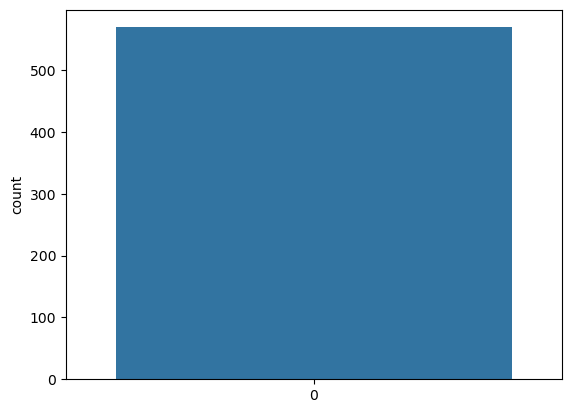

In [10]:
# Task f: Convert the 'Diagnosis' column to numerical values
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Task f: Use seaborn to display count plot for the class label
sns.countplot(data['Diagnosis'])
plt.show()

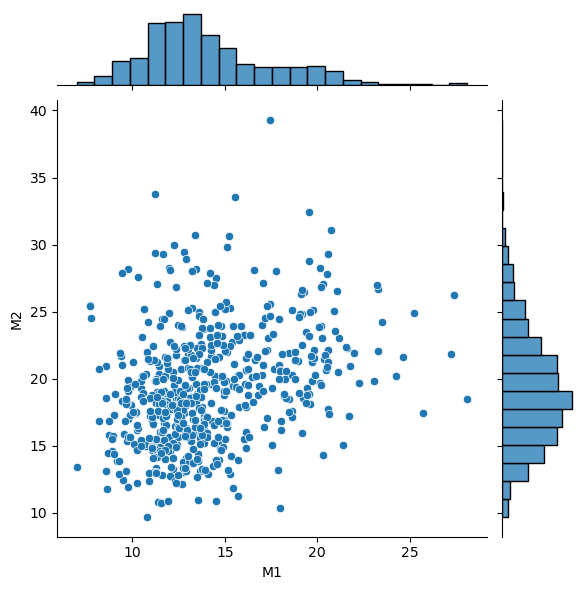

In [15]:
# Task g: Use seaborn to display a joint plot with any two variables of your choice
sns.jointplot(x='M1', y='M2', data=data)
plt.show()

In [19]:
# Split the data such that 25% is reserved for testing
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
# Show the shape of the training set and the test set
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (426, 51)
Test set shape: (143, 51)


Confusion Matrix:
[[38  5]
 [ 0 71]]


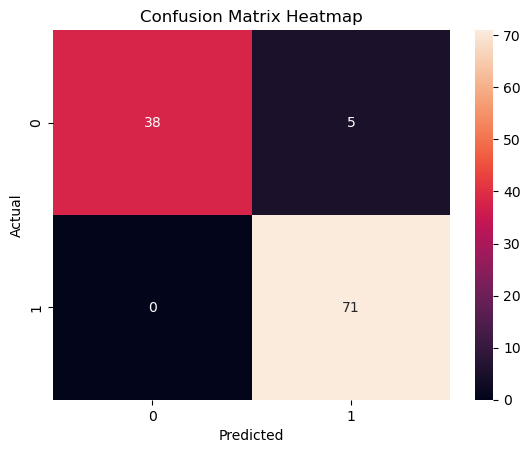

Classification Accuracy: 0.956140350877193
Training Accuracy: 0.9406593406593406
Testing Accuracy: 0.956140350877193


In [81]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Create a dataframe with the feature matrix
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the dataframe
df['target'] = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1).values, df['target'].values, test_size=0.2, random_state=42)

# Train a K-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Heatmap
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

# Training accuracy
train_accuracy = knn_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Testing accuracy
test_accuracy = knn_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

In [47]:
# Train a model using Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# Make predictions on the test set
y_pred = forest_model.predict(X_test)

In [50]:
# Show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[40  3]
 [ 1 70]]


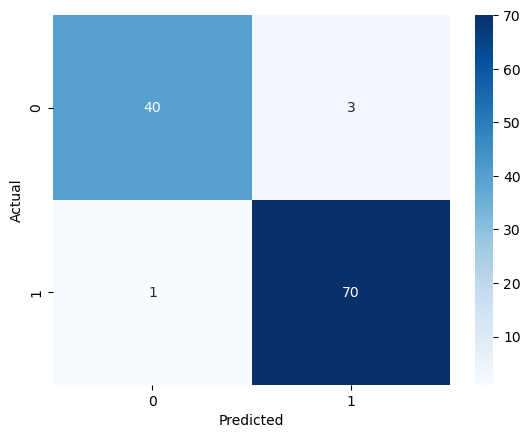

In [51]:
# Show the heatmap of the confusion matrix
sns.heatmap(cm,annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
# Show the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)


Classification Accuracy: 0.9649122807017544


In [55]:
# Compare the training and testing accuracy
train_accuracy = forest_model.score(X_train, y_train)
test_accuracy = forest_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544


In [56]:
# Train a model using SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [57]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)


In [58]:
# Show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[37  6]
 [ 0 71]]


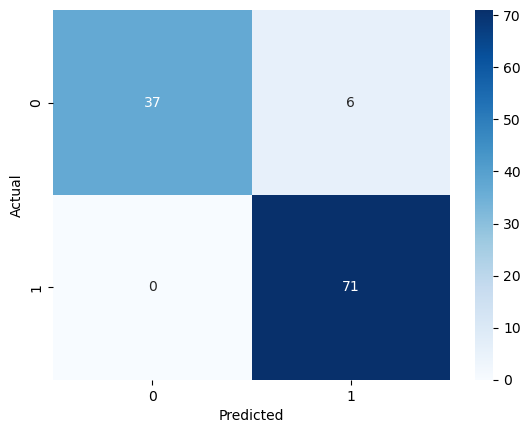

In [59]:
# Show the heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [60]:
# Show the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.9473684210526315


In [61]:
# Compare the training and testing accuracy
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9142857142857143
Testing Accuracy: 0.9473684210526315


In [62]:
# Train a model using Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
# Make predictions on the test set
y_pred = tree_model.predict(X_test)

In [64]:
# Show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[39  4]
 [ 5 66]]


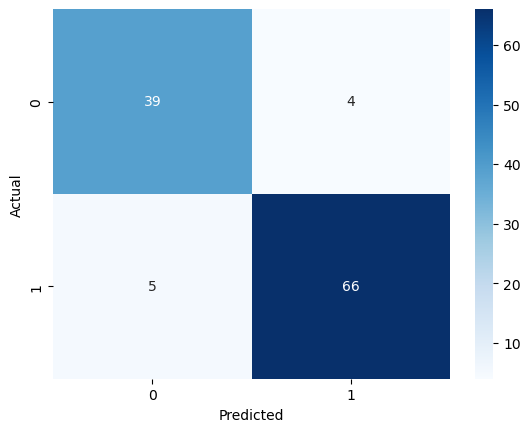

In [65]:
# Show the heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
# Show the classification accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.9210526315789473


In [75]:
# Compare the training and testing accuracy
train_accuracy = tree_model.score(X_train, y_train)
test_accuracy = tree_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9210526315789473


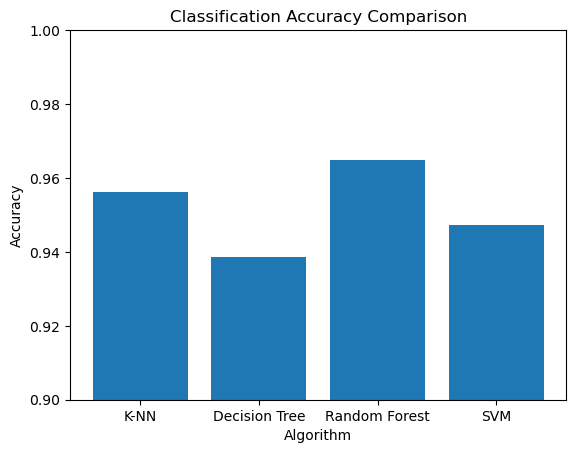

In [82]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Create a dataframe with the feature matrix
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the dataframe
df['target'] = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1).values, df['target'].values, test_size=0.2, random_state=42)

# Initialize the classifiers
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()

# Train the classifiers
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Calculate the classification accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Create a bar plot showing the classification accuracy
algorithms = ['K-NN', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [knn_accuracy, dt_accuracy, rf_accuracy, svm_accuracy]

plt.bar(algorithms, accuracies)
plt.ylim(0.9, 1.0)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy Comparison')
plt.show()